### MLP for digit recognition
using sparse_categorical_crossentropy loss in Keras

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from IPython import display
import numpy as np

### Load the data

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
x_train[0].shape

(28, 28)

In [4]:
x_train[0].max()

255

In [5]:
#reshape
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#normalize the value of every pixel into the range of 0 to 1
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'training samples')
print(x_test.shape[0], 'test samples')

60000 training samples
10000 test samples


create a validation set

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=0)
print('train:', x_train.shape, y_train.shape)
print('validation:', x_val.shape, y_val.shape)
print('test:', x_test.shape, y_test.shape)

train: (54000, 784) (54000,)
validation: (6000, 784) (6000,)
test: (10000, 784) (10000,)


### Show the digit images

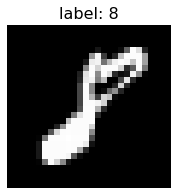

<Figure size 432x288 with 0 Axes>

In [7]:
fig, ax = plt.subplots(figsize=(3, 3))
for n in range(0, x_train.shape[0], 1000):
    I = x_train[n,:].reshape(28,28)
    ax.imshow(I, cmap='gray')
    ax.set_title('label: ' + str(int(y_train[n])), fontsize=16)
    ax.axis('off')
    plt.draw()
    display.clear_output(wait=True)
    display.display(fig)
    plt.pause(0.1) 

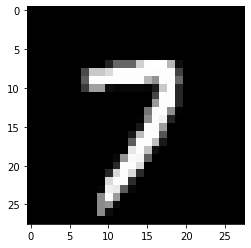

In [8]:
#the first image in the training set
plt.imshow(x_train[0].reshape(28,28), cmap='gray')

In [9]:
#the class label of the first training sample
y_train[0]

7

If we use sparse_categorical_crossentropy loss in Keras, <br>
we do NOT need to convert every class label into a one-hot vector of 10 elements

### Define the MLP model

In [10]:
model = Sequential()
model.add(Dense(units=256, activation='relu', input_shape=(784,)))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer=SGD(lr=0.01, momentum=0.9), 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [11]:
loss_train_list=[]
loss_val_list=[]
acc_train_list=[]
acc_val_list=[]

### Train the model

In [12]:
for epoch in range(0, 10):   
    print('epoch', epoch)
    #set epochs=1
    history=model.fit(x_train, y_train, batch_size=64, epochs=1, validation_data=(x_val, y_val))
    loss_train_list.extend(history.history['loss'])
    loss_val_list.extend(history.history['val_loss'])
    acc_train_list.extend(history.history['accuracy'])
    acc_val_list.extend(history.history['val_accuracy'])
    #save the model to a a HDF5 file 
    model.save('NN_multiclass_classification_Keras_sCE_e'+str(epoch)+'.h5')

epoch 0
844/844 [==============================] - 7s 8ms/step - loss: 0.3636 - accuracy: 0.8962 - val_loss: 0.1716 - val_accuracy: 0.9498
epoch 1
844/844 [==============================] - 7s 8ms/step - loss: 0.1560 - accuracy: 0.9539 - val_loss: 0.1269 - val_accuracy: 0.9603
epoch 2
844/844 [==============================] - 6s 7ms/step - loss: 0.1085 - accuracy: 0.9680 - val_loss: 0.1022 - val_accuracy: 0.9682
epoch 3
844/844 [==============================] - 6s 7ms/step - loss: 0.0828 - accuracy: 0.9753 - val_loss: 0.0823 - val_accuracy: 0.9748
epoch 4
844/844 [==============================] - 6s 8ms/step - loss: 0.0655 - accuracy: 0.9808 - val_loss: 0.0850 - val_accuracy: 0.9718
epoch 5
844/844 [==============================] - 6s 7ms/step - loss: 0.0533 - accuracy: 0.9839 - val_loss: 0.0706 - val_accuracy: 0.9780
epoch 6
844/844 [==============================] - 6s 7ms/step - loss: 0.0434 - accuracy: 0.9877 - val_loss: 0.0752 - val_accuracy: 0.9752
epoch 7
844/844 [==========

### Plot training loss vs epoch and validation loss vs epoch

In [13]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

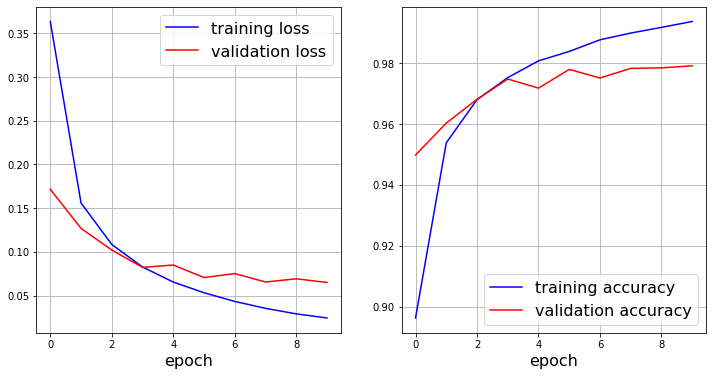

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].plot(np.arange(0,len(loss_train_list)), loss_train_list, '-b', label='training loss')
ax[0].plot(np.arange(0,len(loss_val_list)), loss_val_list, '-r', label='validation loss')
ax[0].set_xlabel('epoch',fontsize=16)
ax[0].legend(fontsize=16)
ax[0].grid(True)
ax[1].plot(np.arange(0,len(acc_train_list)), acc_train_list, '-b', label='training accuracy')
ax[1].plot(np.arange(0,len(acc_val_list)), acc_val_list, '-r', label='validation accuracy')
ax[1].set_xlabel('epoch',fontsize=16)
ax[1].legend(fontsize=16)
ax[1].grid(True)

after training, we load the best model

In [22]:
np.argmax(acc_val_list)

9

In [15]:
from tensorflow.keras.models import load_model
model = load_model('NN_multiclass_classification_Keras_sCE_e9.h5')

### Test the model

In [16]:
score = model.evaluate(x_test, y_test, batch_size=64, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.06353437155485153
Test accuracy: 0.9794999957084656


### Make Prediction on the test set

In [17]:
y_test_pred=model.predict(x_test, batch_size=64)

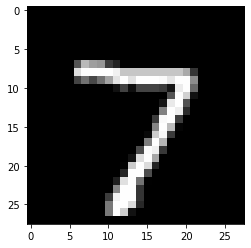

In [18]:
#the first image in the test set
plt.imshow(x_test[0].reshape(28,28), cmap='gray')

ATTENTION: <br>
the output from the model is one-hot vector, although the input is not one-hot

In [19]:
y_test_pred[0]

array([4.4066229e-07, 6.1297023e-08, 6.5831955e-06, 6.8526286e-05,
       9.3563213e-10, 1.4625179e-07, 4.8621168e-12, 9.9989688e-01,
       8.5672065e-07, 2.6411302e-05], dtype=float32)

In [20]:
np.argmax(y_test_pred[0])

7

In [21]:
y_test[0]

7